In [1]:
x = list(range(10))

In [2]:
x[:-1]

[0, 1, 2, 3, 4, 5, 6, 7, 8]

In [28]:
import numpy as np
x = np.array([0, 2, 3, 4, 5])
x1 = np.sqrt(x)
x2 = x*x1

In [29]:
for i in range(5):
    print('%.4f & %.4f \\\\' % (x1[i], x2[i]), end=' ')

0.0000 & 0.0000 \\ 1.4142 & 2.8284 \\ 1.7321 & 5.1962 \\ 2.0000 & 8.0000 \\ 2.2361 & 11.1803 \\ 

In [30]:
X = np.vstack((x1, x2)).T

In [31]:
X

array([[ 0.        ,  0.        ],
       [ 1.41421356,  2.82842712],
       [ 1.73205081,  5.19615242],
       [ 2.        ,  8.        ],
       [ 2.23606798, 11.18033989]])

In [32]:
Y = np.array([1,4,8,12,17]).reshape((5,1))

In [33]:
Y

array([[ 1],
       [ 4],
       [ 8],
       [12],
       [17]])

In [34]:
np.linalg.inv(X.T@X)@X.T@Y

array([[-0.18778575],
       [ 1.55843364]])

/usr/local/anaconda3-4.4.0/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in sqrt
  after removing the cwd from sys.path.


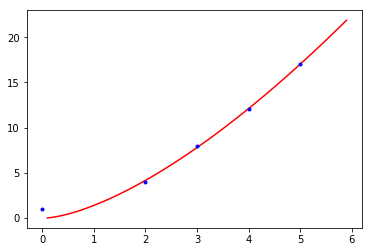

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline
tmp = np.arange(-1, 6, 0.1)
plt.plot(tmp, -0.1878*np.sqrt(tmp) + 1.5584*np.sqrt(tmp)*tmp, 'r')
plt.plot(x, Y, 'b.')

In [34]:
log = '/s/red/a/nobackup/vision/jason/DraperLab/coordinateSys/demo_pointing/v1/rh_record.txt'
var_log = '/s/red/a/nobackup/vision/jason/DraperLab/coordinateSys/demo_pointing/v1/rh_var.txt'

In [35]:
#tuple('(-2.0332616631103693, -13.811457184648097)\t(-0.3906544782230804, -0.07464840115546603)'.split('\t')[1])

In [43]:
f = open(log, 'r')
c = [[]]
for l in f:
    if l[0] == '*':
        c.append([])
        continue
    else:
        line = l
    x, y = line.split('\t')[1][1:-2].split(', ')
    c[-1].append([float(x), float(y)])
#     print(rcoord)
#     break
f.close()

f = open(var_log, 'r')
v = [[]]
for l in f:
    if l[0] == '*':
        v.append([])
        continue
    else:
        line = l
    tmp = line.split('\t')[1][1:-2]
    while tmp[0] == ' ':
        tmp = tmp[1:]
    res = ['', '']
    i = 0
    prev_letter = tmp[0]
    for letter in tmp:
        if letter.isdigit() or letter == '.':
            res[i] += letter
        elif letter == ' ' and prev_letter != ' ':
            i += 1
        prev_letter = letter
            
        
    v[-1].append([float(res[0]), float(res[1])])
#     print(rcoord)
#     break
f.close()

In [44]:
print(len(c), len(v))

12 12


263
263
262
263
258
258
262
260
263
258
258
259


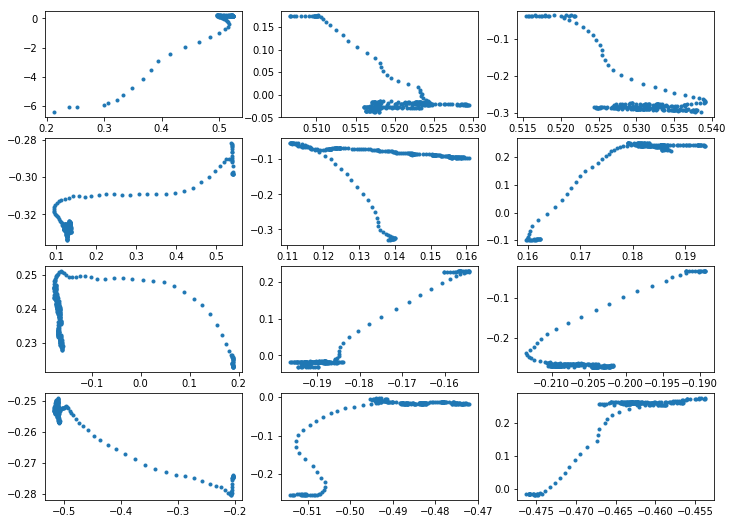

In [49]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 9))
for i in range(12):
    print(len(c[i]))
    plt.subplot(4, 3, i+1)
    plt.plot(np.array(c[i])[:, 0], np.array(c[i])[:, 1], '.')
plt.show()

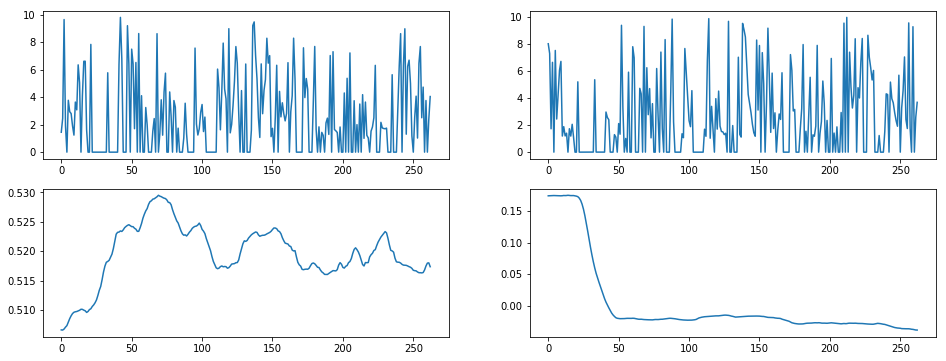

In [60]:
plt.figure(figsize=(16, 6))
plt.subplot(2,2,1)
plt.plot(np.array(v[1])[:, 0])
plt.subplot(2,2,2)
plt.plot(np.array(v[1])[:, 1])
plt.subplot(2,2,3)
plt.plot(np.array(c[1])[:, 0])
plt.subplot(2,2,4)
plt.plot(np.array(c[1])[:, 1])
plt.show()

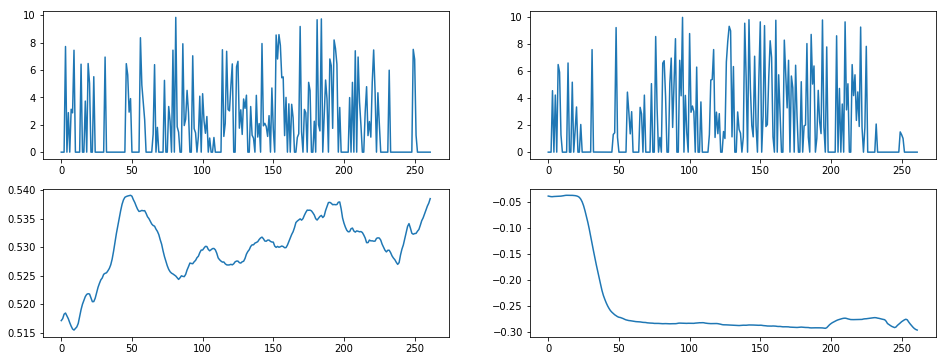

In [61]:
plt.figure(figsize=(16, 6))
plt.subplot(2,2,1)
plt.plot(np.array(v[2])[:, 0])
plt.subplot(2,2,2)
plt.plot(np.array(v[2])[:, 1])
plt.subplot(2,2,3)
plt.plot(np.array(c[2])[:, 0])
plt.subplot(2,2,4)
plt.plot(np.array(c[2])[:, 1])
plt.show()

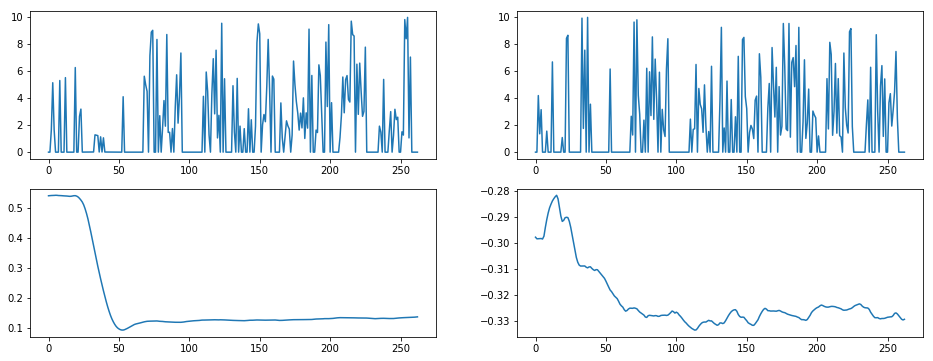

In [62]:
plt.figure(figsize=(16, 6))
plt.subplot(2,2,1)
plt.plot(np.array(v[3])[:, 0])
plt.subplot(2,2,2)
plt.plot(np.array(v[3])[:, 1])
plt.subplot(2,2,3)
plt.plot(np.array(c[3])[:, 0])
plt.subplot(2,2,4)
plt.plot(np.array(c[3])[:, 1])
plt.show()

263
263
262
263
258
258
262
260
263
258
258
259


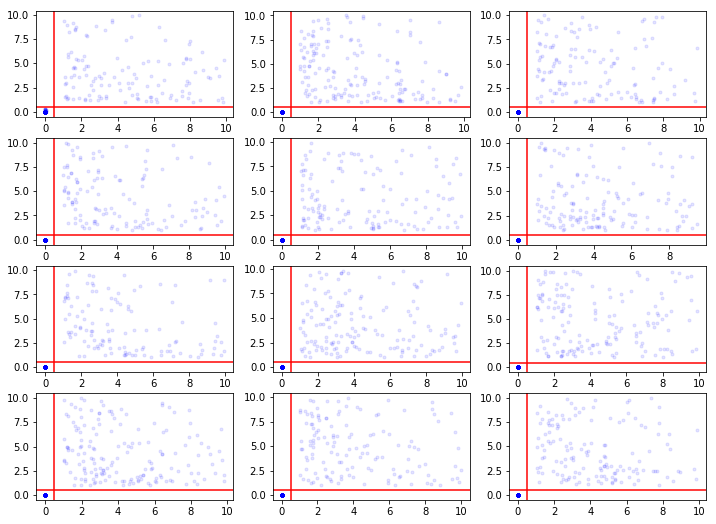

In [51]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(12, 9))
for i in range(12):
    print(len(v[i]))
    plt.subplot(4, 3, i+1)
    plt.plot(np.array(v[i])[:, 0], np.array(v[i])[:, 1], '.', color='b', alpha=.1)
    plt.axhline(y=0.5, color='r', linestyle='-')
    plt.axvline(x=0.5, color='r', linestyle='-')
plt.show()

In [55]:
for i in range(12):
    print(np.logical_or(np.array(v[i])[:, 0] > 1, np.array(v[i])[:, 1] > 1))

[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False  True  True False False False  True False False False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True False False False False False False False  True False False False
 False False  True  True  True  True  True  True False False False False
 False False False False  True  True  True False False False False False
 False False False False  True  True False False False False False False
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True False False  True False False  True
 False False  True  True  True  True  True  True  T

In [26]:
c[0]

[[0.5426177077334611, 0.07056901710860955],
 [0.5690739322654148, 0.08289517633833687],
 [0.5694055959505591, 0.08436658886971757],
 [0.5616670630182742, 0.08750577974358079],
 [0.5616640649873003, 0.09227453239322031],
 [0.5595250921603814, 0.098152802110065],
 [0.5566025613094604, 0.10394750171393306],
 [0.5533894801807163, 0.10966496114417804],
 [0.5499482190714529, 0.11506403457302025],
 [0.5461711693839216, 0.1200209941541887],
 [0.5424738049991437, 0.12412196514424072],
 [0.5384564322389201, 0.12767840382864773],
 [0.5348141632030671, 0.13049431453989818],
 [0.5322167316062033, 0.13233947684007186],
 [0.5296567042437178, 0.13354645854885386],
 [0.5276648301787152, 0.13438568882473806],
 [0.5266889710379246, 0.13446566529149037],
 [0.5256954232188983, 0.13432439361429022],
 [0.5249471940694855, 0.1344396092457425],
 [0.5247809925990059, 0.1342145803633366],
 [0.5250803525747773, 0.13409665974331927],
 [0.525673910109247, 0.13386360350712853],
 [0.5258314321955774, 0.13311501185484